# QV on Deneb

In [1]:
%load_ext autoreload
%autoreload 2

## Choose Deneb as a backend

In [2]:
backend = "deneb"

## Set IQM Token if using Resonance.

In [3]:
import os
os.environ["IQM_TOKEN"] = ""

## Quantum Volume Configuration

In [48]:
from iqm.benchmarks.quantum_volume.quantum_volume import *

In [6]:
EXAMPLE_QV = QuantumVolumeConfiguration(
    num_circuits=500,
    shots=2**8,
    calset_id=None,
    num_sigmas=2,
    choose_qubits_routine="custom",
    custom_qubits_array=[[1,2,4]],
    qiskit_optim_level=3,
    optimize_sqg=True,
    routing_method="sabre",
    physical_layout="fixed",
    max_gates_per_batch=60_000,
    rem=True,
    mit_shots=1_000,
)

## Run the experiment

In [7]:
benchmark_qv = QuantumVolumeBenchmark(backend, EXAMPLE_QV)
run0_qv = benchmark_qv.run()

2024-12-23 13:13:25,269 - iqm.benchmarks.logging_config - INFO - Executing QV on qubits [1, 2, 4]
2024-12-23 13:13:25,799 - iqm.benchmarks.logging_config - INFO - Successfully generated all 500 circuits to be executed
2024-12-23 13:13:25,799 - iqm.benchmarks.logging_config - INFO - Will transpile according to "fixed" physical layout
2024-12-23 13:13:25,799 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQM Backend with optimization level 3, sabre routing method and SQG optimization all circuits
2024-12-23 13:13:46,649 - iqm.benchmarks.logging_config - INFO - Submitting batch with 500 circuits corresponding to qubits [1, 2, 4]
2024-12-23 13:13:46,668 - iqm.benchmarks.logging_config - INFO - max_gates_per_batch restriction: submitting subbatch #1 with 500 circuits corresponding to qubits [1, 2, 4]
C:\Users\PedroFigueroaRomero\anaconda3\envs\iqm-benchmarks\Lib\site-packages\iqm\qiskit_iqm\iqm_provider.py:170: UserWarning: Unknown backend option(s): {'calibration_set_id'}

One can perform a separate run of the benchmark (also possible with a different configuration)

In [8]:
#run1_qv = benchmark_qv.run()

## Inspect the circuits

In [55]:
display(run0_qv.circuits["untranspiled_circuits"][str([1,2,4])].circuits[0].draw())
display(run0_qv.circuits["transpiled_circuits"][str([1,2,4])].circuits[0].draw())

┌──────────┐┌──────────┐ ░ ┌─┐      
   q_0: ────────────┤0         ├┤0         ├─░─┤M├──────
        ┌──────────┐│          ││          │ ░ └╥┘┌─┐   
   q_1: ┤1         ├┤  Unitary ├┤  Unitary ├─░──╫─┤M├───
        │  Unitary ││          ││          │ ░  ║ └╥┘┌─┐
   q_2: ┤0         ├┤1         ├┤1         ├─░──╫──╫─┤M├
        └──────────┘└──────────┘└──────────┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════════════════════╩══╩══╩═
                                                0  1  2

┌───────┐       ┌───────┐                          »
q_0: ──────────────────────┤1      ├─■─────┤1      ├──────────────────────────»
     ┌────────────────────┐│  Move │ │     │  Move │    ┌────────────────────┐»
q_1: ┤ R(0.48526,0.79781) ├┤0      ├─┼─────┤0      ├────┤ R(0.58665,-1.3705) ├»
     └┬──────────────────┬┘└───────┘ │ ┌───┴───────┴───┐└────────────────────┘»
q_2: ─┤ R(2.1471,4.1775) ├───────────■─┤ R(π/2,5.1521) ├──────────────────────»
      └──────────────────┘             └───────────────┘                      »
q_3: ─────────────────────────────────────────────────────────────────────────»
     ┌───────────────────┐                                                    »
q_4: ┤ R(0.73475,3.1344) ├────────────────────────────────────────────────────»
     └───────────────────┘                                                    »
q_5: ─────────────────────────────────────────────────────────────────────────»
                                                                              »
q_6: ─────────────────────────────────────────────────────────────────────────»
                                                                              »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌───────┐       ┌───────┐                         ┌───────┐   »
«q_0: ┤1      ├─■─────┤1      ├─────────────────────────┤1      ├─■─»
«     │  Move │ │     │  Move │    ┌───────────────────┐│  Move │ │ »
«q_1: ┤0      ├─┼─────┤0      ├────┤ R(0.30103,1.7711) ├┤0      ├─┼─»
«     └───────┘ │ ┌───┴───────┴───┐└───────────────────┘└───────┘ │ »
«q_2: ──────────■─┤ R(π/2,11.273) ├───────────────────────────────■─»
«                 └───────────────┘                                 »
«q_3: ──────────────────────────────────────────────────────────────»
«                                                                   »
«q_4: ──────────────────────────────────────────────────────────────»
«                                                                   »
«q_5: ──────────────────────────────────────────────────────────────»
«                                                                   »
«q_6: ──────────────────────────────────────────────────────────────»
«                                                                   »
«c: 3/══════════════════════════════════════════════════════════════»
«                                                                   »
«          ┌───────┐                          ┌───────┐      ┌───────┐    »
«q_0: ─────┤1      ├──────────────────────────┤1      ├─■────┤1      ├────»
«          │  Move │      ┌──────────────────┐│  Move │ │    │  Move │    »
«q_1: ─────┤0      ├──────┤ R(1.3108,6.6909) ├┤0      ├─┼────┤0      ├────»
«     ┌────┴───────┴─────┐└──────────────────┘└───────┘ │    └───────┘    »
«q_2: ┤ R(1.6665,11.243) ├──────────────────────────────┼─────────────────»
«     └──────────────────┘                              │                 »
«q_3: ──────────────────────────────────────────────────┼─────────────────»
«                                                       │ ┌──────────────┐»
«q_4: ──────────────────────────────────────────────────■─┤ R(π/2,1.447) ├»
«                                                         └──────────────┘»
«q_5: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«q_6: ────────────────────────────────────────────────────────────────────»
«                                                                         »
«c: 3/════════════════════════════════════════════════════════════════════»
«                                                                         »
«                          ┌───────┐      ┌───────┐                         »
«q_0: ─────────────────────┤1      ├─■────┤1      ├─────────────────────────»
«     ┌───────────────────┐│ 

## Perform Analysis

In [9]:
result0_qv = benchmark_qv.analyze()

2024-12-23 13:15:52,651 - iqm.benchmarks.logging_config - INFO - Noiseless simulation and post-processing for layout [1, 2, 4]
2024-12-23 13:15:54,360 - iqm.benchmarks.logging_config - INFO - REM post-processing for layout [1, 2, 4] with 1000 shots


In [10]:
#result1_qv = benchmark.analyze(run_index=0)

List all the keys in the attributes of the dataset

In [11]:
attr_keys = sorted([str(x) for x in list(result0_qv.dataset.attrs.keys())])
for k in attr_keys:
    print(k)

0
REM_quasidistributions
backend_configuration_name
backend_name
benchmark
calset_id
choose_qubits_routine
custom_qubits_array
execution_timestamp
max_gates_per_batch
mit_shots
num_circuits
num_sigmas
optimize_sqg
physical_layout
qiskit_optim_level
rem
routing_method
session_timestamp
shots


The data for specific experiments is indexed by 0,1,..., e.g., for the first experiment:

In [12]:
for k in result0_qv.dataset.attrs[0].keys():
    print(k)

qubits
qv_results_type
time_circuit_generation
time_transpilation
time_batching
time_submit
time_retrieve
all_job_metadata
operation_counts
cumulative_average_heavy_output_probability
cumulative_stddev_heavy_output_probability
heavy_output_probabilities
REM_cumulative_average_heavy_output_probability
REM_cumulative_stddev_heavy_output_probability
REM_heavy_output_probabilities


In [57]:
#result0_qv.dataset.attrs[0]["heavy_output_probabilities"]

The observation object contains the benchmark results

In [14]:
result0_qv.observations

[BenchmarkObservation(name='average_heavy_output_probability', value=0.71478125, identifier=BenchmarkObservationIdentifier(qubit_indices=[1, 2, 4]), uncertainty=0.020192524094250205),
 BenchmarkObservation(name='is_succesful', value=True, identifier=BenchmarkObservationIdentifier(qubit_indices=[1, 2, 4]), uncertainty=None),
 BenchmarkObservation(name='QV_result', value=8, identifier=BenchmarkObservationIdentifier(qubit_indices=[1, 2, 4]), uncertainty=None),
 BenchmarkObservation(name='REM_average_heavy_output_probability', value=0.7261292473074281, identifier=BenchmarkObservationIdentifier(qubit_indices=[1, 2, 4]), uncertainty=0.019943197512544274),
 BenchmarkObservation(name='REM_is_succesful', value=True, identifier=BenchmarkObservationIdentifier(qubit_indices=[1, 2, 4]), uncertainty=None),
 BenchmarkObservation(name='REM_QV_result', value=8, identifier=BenchmarkObservationIdentifier(qubit_indices=[1, 2, 4]), uncertainty=None)]

## Generate plots

In [15]:
for k in result0_qv.plots.keys():
    print(k)

vanilla_3_qubits_[1, 2, 4]
vanilla_REM_3_qubits_[1, 2, 4]


Print a specific output

In [16]:
# result0_qv.plots["vanilla_4_qubits_[0, 1, 3, 4]"]

Or print all the plots at once

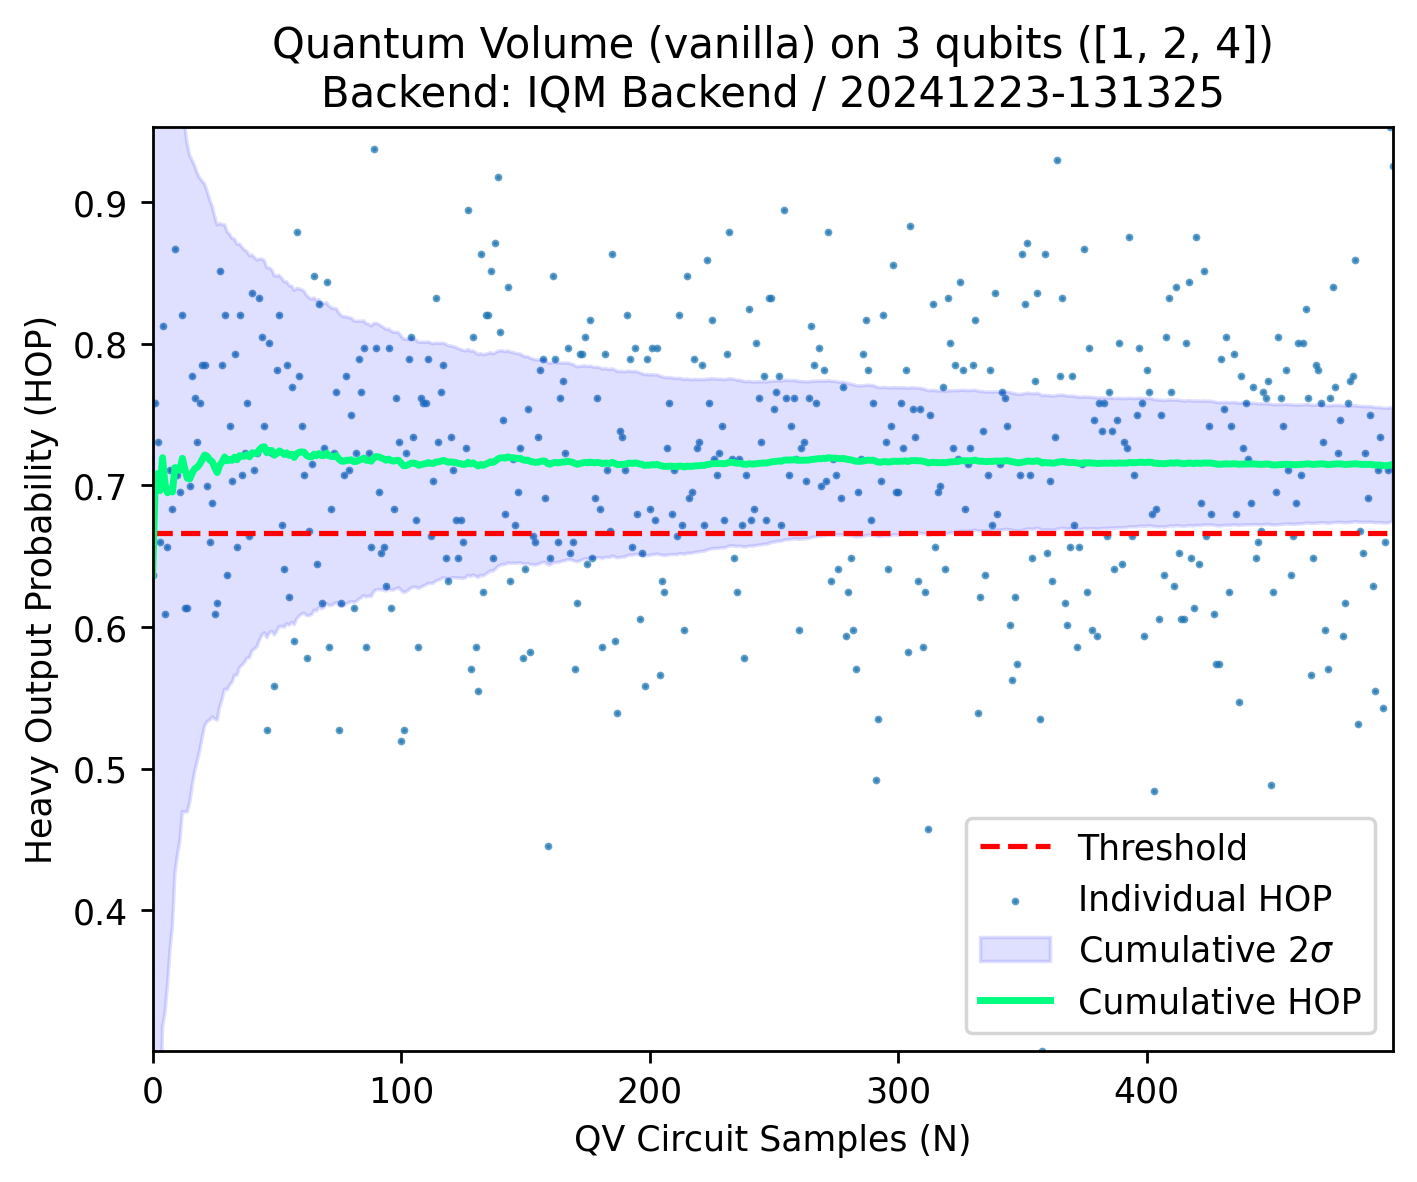

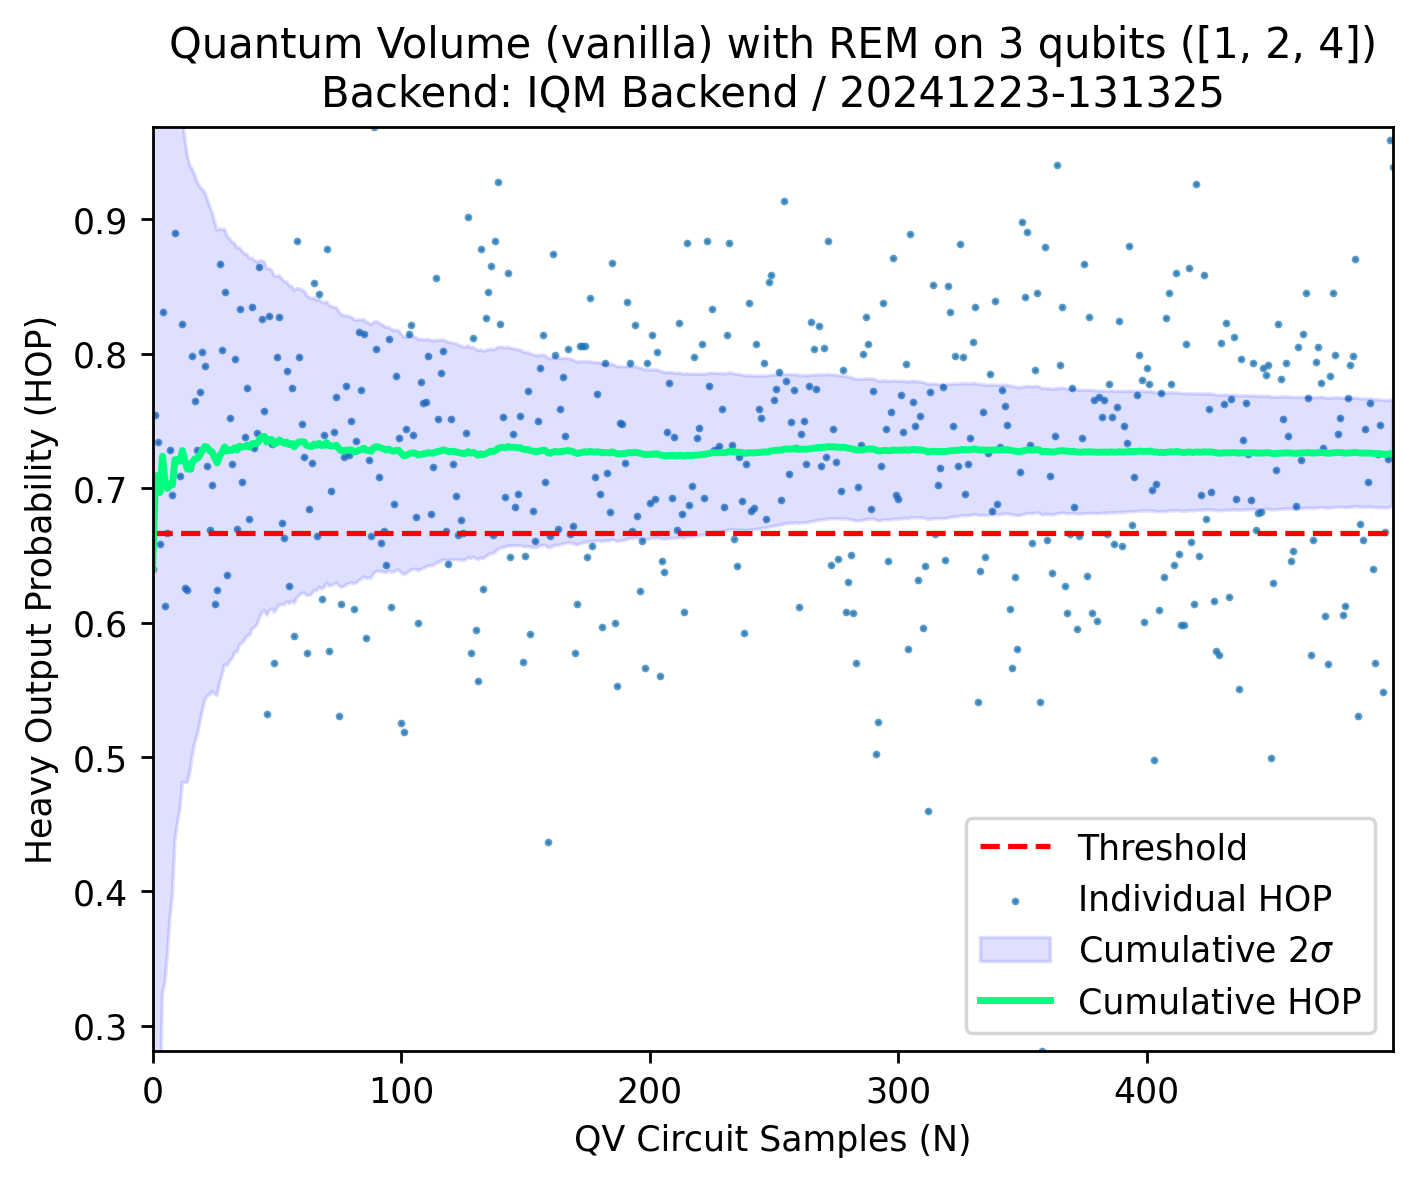

In [17]:
result0_qv.plot_all()